# Erzeugung von Zufallszahlen

## Normalverteilte Zufallszahlen

In [ ]:
import numpy

In [ ]:
!pip install numpy

In [ ]:
A = numpy.random.normal(loc=0.0, scale=1.0, size=10000)

In [ ]:
A[:10]

In [ ]:
A.shape

In [ ]:
A.ndim

In [ ]:
numpy.mean(A)

In [ ]:
numpy.std(A)

In [ ]:
numpy.min(A)

In [ ]:
numpy.max(A)

In [ ]:
import matplotlib.pyplot as plt
A = numpy.random.normal(loc=0.0, scale=1.0, size=10000)
B = numpy.random.normal(loc=2.5, scale=0.5, size=10000)
plt.hist(A, bins=50, color="orange")
plt.hist(B, bins=50, color="red")
plt.show()

## Gleichverteilte Zufallszahlen

In [ ]:
[numpy.random.randint(low=-3, high=+3) for _ in range(10)]

In [ ]:
import matplotlib.pyplot as plt
A = numpy.random.uniform(low=-5.0, high=+7.0, size=10000)
plt.hist(A, bins=50, color="orange", edgecolor="black")
plt.show()

# Einen Sensor simulieren

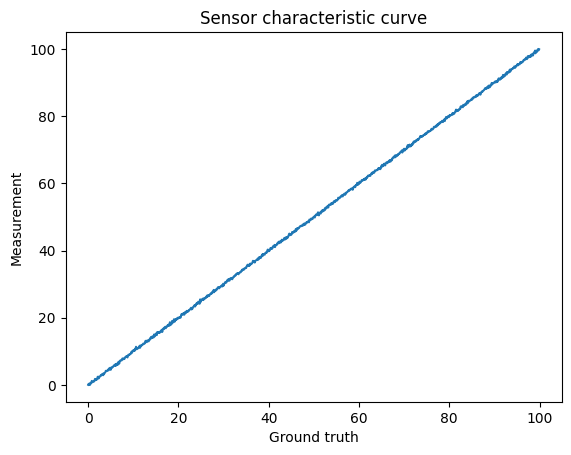

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Sensor:

    def __init__(self, variance):
        self.variance = variance

    def measure(self, ground_truth):
        noise = np.random.normal(loc=0.0, scale=self.variance)
        measurement = ground_truth + noise
        return measurement

    def measure_many(self, ground_truth, N):
        measurements = [self.measure(ground_truth) for _ in range(N)]
        return measurements

    def show_characteristic_curve(self, start, end, step=0.1):
        ground_truths = []
        measurements = []
        for ground_truth in np.arange(start,end,step):
            ground_truths.append( ground_truth )
            measurements.append( self.measure(ground_truth) )
            
        plt.plot(ground_truths, measurements)
        plt.title("Sensor characteristic curve")
        plt.xlabel("Ground truth")
        plt.ylabel("Measurement")
        plt.show()

    def __str__(self):
        return f"Distance sensor: variance={self.variance:.2f}"

    def __repr__(self):
        return str(self)
    

s1 = Sensor(0.2)
s2 = Sensor(0.5)
s3 = Sensor(1.5)

t = 50.0
N = 10

m1 = s1.measure_many(ground_truth=t, N=N)
s1.show_characteristic_curve(start=0.0, end=100.0)

In [ ]:
m1

# Sensordatenfusion mittels Mittelwertschätzer

In [ ]:
nr_sensors = 3
variance = 1.0
sensors = [Sensor(variance) for _ in range(nr_sensors)]

In [ ]:
len(sensors)

In [ ]:
sensors

In [ ]:
gt = 50.0
multiple_measurements = [sensor.measure(gt) for sensor in sensors]
multiple_measurements

In [ ]:
variance

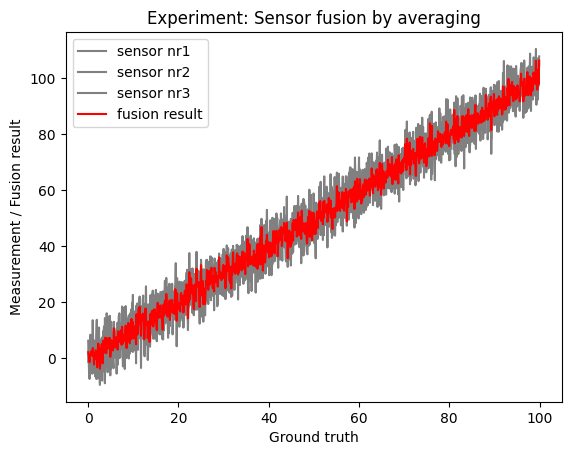

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class SensorFusionAvg:

    def __init__(self, nr_sensors, variance):        
        self.nr_sensors = nr_sensors
        self.variance = variance
        self.sensors = [Sensor(variance) for _ in range(nr_sensors)]

    def measure_and_fuse(self, gt):
        measurements = [sensor.measure(gt) for sensor in self.sensors]
        avg = sum(measurements) / len(measurements)
        return measurements, avg

    def experiment(self, start, end, step=0.1):
        measurements_over_time = []
        fusion_results = []
        ground_truths = []
        for ground_truth in np.arange(start,end,step):
            measurements, avg = self.measure_and_fuse(ground_truth)
            ground_truths.append( ground_truth )
            measurements_over_time.append( measurements )
            fusion_results.append( avg )
        
        for sensor_nr in range(self.nr_sensors):
            meas_for_sensor = [v[sensor_nr] for v in measurements_over_time]
            plt.plot( ground_truths, meas_for_sensor,
                      label=f"sensor nr{sensor_nr+1}",
                      color="gray")
        plt.plot(ground_truths, fusion_results, label="fusion result", color="red")
        plt.title("Experiment: Sensor fusion by averaging")
        plt.xlabel("Ground truth")
        plt.ylabel("Measurement / Fusion result")
        plt.legend()
        plt.show()

f1 = SensorFusionAvg(nr_sensors=3, variance=5)
f1.experiment(start=0.0, end=100.0)

# Sensordatenfusion mittels IVW-Schätzer

In [ ]:
import numpy as np
np.random.uniform(low=0, high=5)

In [ ]:
int(np.argmin(np.array([2.4, 0.3, 9.4, 0.2, 2.5])))

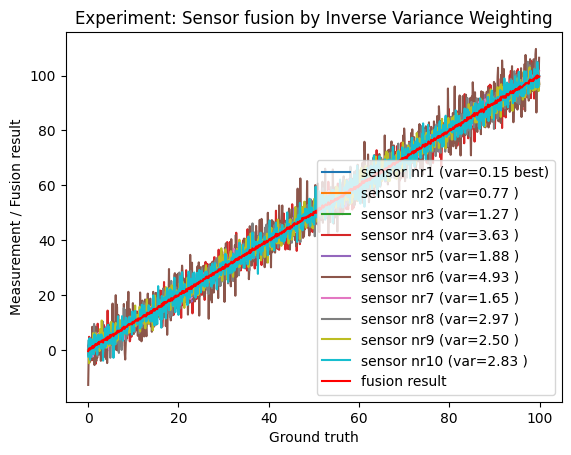

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class SensorFusionIVW:

    def __init__(self, nr_sensors, max_variance):        
        self.nr_sensors = nr_sensors
        self.sensors = []
        self.sensor_variances = []
        for _ in range(nr_sensors):
            variance = np.random.uniform(low=0, high=max_variance)
            self.sensor_variances.append ( variance )
            self.sensors.append( Sensor(variance) )
        self.best_sensor_nr = np.argmin(np.array(self.sensor_variances))

    def measure_and_fuse(self, gt):
        measurements = []
        fusion_result = 0.0
        normalization_fac = 0.0
        for sensor in self.sensors:
            measurement = sensor.measure(gt)
            measurements.append( measurement )
            fusion_result += (1/sensor.variance) * measurement
            normalization_fac += (1/sensor.variance)
        fusion_result /= normalization_fac
    
        return measurements, fusion_result

    def experiment(self, start, end, step=0.1):
        measurements_over_time = []
        fusion_results = []
        ground_truths = []
        for ground_truth in np.arange(start,end,step):
            measurements, avg = self.measure_and_fuse(float(ground_truth))
            ground_truths.append( float(ground_truth) )
            measurements_over_time.append( measurements )
            fusion_results.append( avg )
        
        for sensor_nr in range(self.nr_sensors):
            meas_for_sensor = [v[sensor_nr] for v in measurements_over_time]
            var = self.sensors[sensor_nr].variance
            add_txt = ""
            if sensor_nr == self.best_sensor_nr:
                add_txt = "best"
            plt.plot( ground_truths, meas_for_sensor,                     
                      label=f"sensor nr{sensor_nr+1} ({var=:.2f} {add_txt})")
        plt.plot(ground_truths, fusion_results, label="fusion result", color="red")
        plt.title("Experiment: Sensor fusion by Inverse Variance Weighting")
        plt.xlabel("Ground truth")
        plt.ylabel("Measurement / Fusion result")
        plt.legend()
        plt.show()

        measurements_best_sensor = [v[self.best_sensor_nr] for v in measurements_over_time]

        return np.array(ground_truths), np.array(measurements_best_sensor), np.array(fusion_results)

f1 = SensorFusionIVW(nr_sensors=10, max_variance=5)
ground_truths, measurements_best_sensor, fusion_results = f1.experiment(start=0.0, end=100.0)

In [ ]:
#        Mean Abs Errors
MAE = np.mean(abs(ground_truths - measurements_best_sensor))
MAE

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ground_truths, measurements_best_sensor)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ground_truths, fusion_results)

# Sensorklasse mit Bias

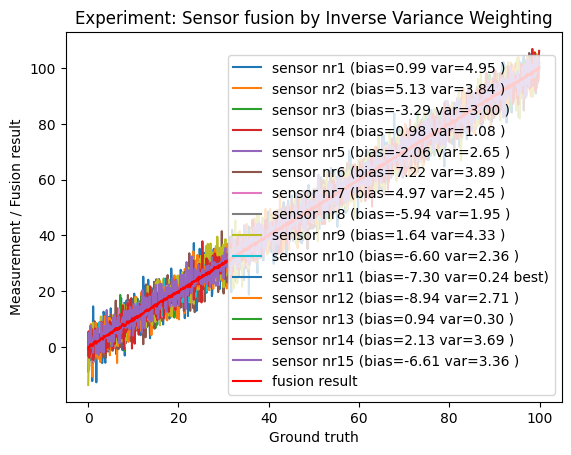

MAE= 0.2403337787965929


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Sensor:

    def __init__(self, variance, bias):
        self.variance = variance
        self.bias = bias

        errors = []
        for ground_truth in np.arange(0.0,100.0,0.1):
            #measurement = s1.measure(ground_truth) # HIER WAR DER FEHLER!
            measurement = self.measure(ground_truth) # SO IST ES RICHTIG!
            error = measurement - ground_truth
            errors.append(error)
        self.estimated_bias = np.mean( errors )

    def measure(self, ground_truth):
        noise = np.random.normal(loc=self.bias, scale=self.variance)
        measurement = ground_truth + noise
        return measurement

    def measure_many(self, ground_truth, N):
        measurements = [self.measure(ground_truth) for _ in range(N)]
        return measurements

    def show_characteristic_curve(self, start, end, step=0.1):
        ground_truths = []
        measurements = []
        for ground_truth in np.arange(start,end,step):
            ground_truths.append( ground_truth )
            measurements.append( self.measure(ground_truth) )
            
        plt.plot(ground_truths, measurements)
        plt.title("Sensor characteristic curve")
        plt.xlabel("Ground truth")
        plt.ylabel("Measurement")
        plt.show()

    def __str__(self):
        return f"Distance sensor: variance={self.variance:.2f}"

    def __repr__(self):
        return str(self)

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(45)
BIAS_CORRECTION = True

class SensorFusionIVW:

    def __init__(self, nr_sensors, max_variance, max_bias):        
        self.nr_sensors = nr_sensors
        self.sensors = []
        self.sensor_variances = []
        for _ in range(nr_sensors):
            variance = np.random.uniform(low=0, high=max_variance)
            bias = np.random.uniform(low=-max_bias, high=+max_bias)
            self.sensor_variances.append ( variance )
            self.sensors.append( Sensor(variance, bias) )
        self.best_sensor_nr = np.argmin(np.array(self.sensor_variances))

    def measure_and_fuse(self, gt):
        measurements = []
        fusion_result = 0.0
        normalization_fac = 0.0
        for sensor in self.sensors:
            measurement = sensor.measure(gt)
            if BIAS_CORRECTION:
                measurement -= sensor.estimated_bias # BIAS-KORREKTUR!
            measurements.append( measurement )
            fusion_result += (1/sensor.variance) * measurement
            normalization_fac += (1/sensor.variance)
        fusion_result /= normalization_fac
    
        return measurements, fusion_result

    def experiment(self, start, end, step=0.1):
        measurements_over_time = []
        fusion_results = []
        ground_truths = []
        for ground_truth in np.arange(start,end,step):
            measurements, avg = self.measure_and_fuse(float(ground_truth))
            ground_truths.append( float(ground_truth) )
            measurements_over_time.append( measurements )
            fusion_results.append( avg )
        
        for sensor_nr in range(self.nr_sensors):
            meas_for_sensor = [v[sensor_nr] for v in measurements_over_time]
            var = self.sensors[sensor_nr].variance
            bias = self.sensors[sensor_nr].bias
            add_txt = ""
            if sensor_nr == self.best_sensor_nr:
                add_txt = "best"
            plt.plot( ground_truths, meas_for_sensor,                     
                      label=f"sensor nr{sensor_nr+1} ({bias=:.2f} {var=:.2f} {add_txt})")
        plt.plot(ground_truths, fusion_results, label="fusion result", color="red")
        plt.title("Experiment: Sensor fusion by Inverse Variance Weighting")
        plt.xlabel("Ground truth")
        plt.ylabel("Measurement / Fusion result")
        plt.legend()
        plt.show()

        measurements_best_sensor = [v[self.best_sensor_nr] for v in measurements_over_time]

        return np.array(ground_truths), np.array(measurements_best_sensor), np.array(fusion_results)

f1 = SensorFusionIVW(nr_sensors=15, max_variance=5, max_bias=10)
ground_truths,_, fusion_results = f1.experiment(start=0.0, end=100.0)

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(ground_truths, fusion_results)
print("MAE=", MAE)

# Sensoren mit nicht-linearer Kennlinie

In [ ]:
namen = ["Brauer", "Maier", "Schulze"]
vornamen = ["Jürgen", "Egon", "Heinz"]
for i in range(len(namen)):
    print(vornamen[i], namen[i])

for vorname, name in zip(vornamen, namen):
    print(vorname, name)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Sensor:

    def __init__(self, variance, bias, logfac):
        self.variance = variance
        self.bias = bias
        self.logfac = logfac

        errors = []
        for ground_truth in np.arange(0.001,100.0,0.1):
            measurement = self.measure(ground_truth)
            error = measurement - ground_truth
            errors.append(error)
        self.estimated_bias = np.mean( errors )

    def measure(self, ground_truth):
        epsilon = 1e-5
        noise = np.random.normal(loc=self.bias, scale=self.variance)
        measurement = np.log(ground_truth+epsilon)*self.logfac + noise
        return measurement

    def measure_many(self, ground_truth, N):
        measurements = [self.measure(ground_truth) for _ in range(N)]
        return measurements

    def show_characteristic_curve(self, start, end, step=0.1):
        ground_truths = []
        measurements = []
        for ground_truth in np.arange(start,end,step):
            ground_truths.append( ground_truth )
            measurements.append( self.measure(ground_truth) )
            
        plt.plot(ground_truths, measurements)
        plt.title("Sensor characteristic curve")
        plt.xlabel("Ground truth")
        plt.ylabel("Measurement")
        
    def __str__(self):
        return f"Distance sensor: variance={self.variance:.2f}"

    def __repr__(self):
        return str(self)

    def create_inverse_sensor_model(self, start, end, step=0.1):

        ground_truths = []
        measurements = []
        for ground_truth in np.arange(start,end,step):
            sum_measurements = 0.0
            N = 10
            for meas_nr in range(N):
                measurement = self.measure(ground_truth)
                sum_measurements += measurement
            avg_measurement_val = sum_measurements/N
            ground_truths += [ground_truth]
            measurements += [avg_measurement_val]

        d = {"Messwert" : measurements,
             "Entfernung" : ground_truths}

        self.ism = pd.DataFrame(d)
        return self.ism

    def map_sensor_value_to_distance(self, sensor_val):
        distances = abs(self.ism["Messwert"] - sensor_val)
        row_idx = distances.idxmin()
        return self.ism["Entfernung"].iloc[row_idx]
        

# N Sensoren simulieren
sensors = [Sensor(0.1,3,10),
           Sensor(1.0,-4,20),
           Sensor(1.2,-10,40)]

# Für jeden Sensor das Inverse Sensor Modell aufbauen
for sensor in sensors:
    sensor.create_inverse_sensor_model(0.01, 100.0)

# Eine Messung simulieren
gt = 50.3
measurements = [sensor.measure(gt) for sensor in sensors]

# Nutze das ISM, um die Messwerte auf Distanzschätzungen abzubilden
distances = [s.map_sensor_value_to_distance(v) for s,v in zip(sensors, measurements)]

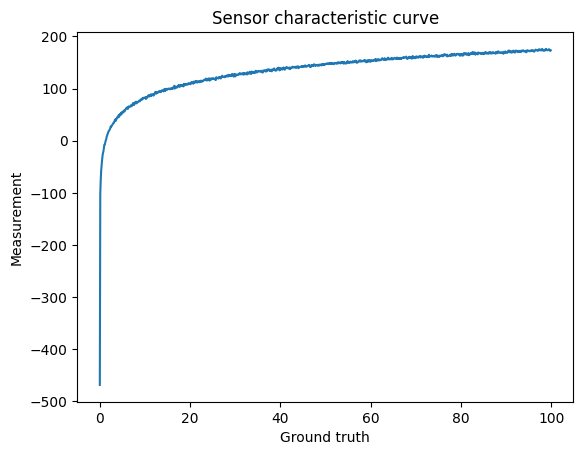

In [21]:
sensors[-1].show_characteristic_curve(0.0, 100.0)

In [18]:
measurements

[np.float64(42.14245465436498),
 np.float64(73.56382594646823),
 np.float64(145.98238720021376)]

In [19]:
distances

[np.float64(50.11), np.float64(47.81), np.float64(48.910000000000004)]

In [20]:
sensors[0].create_inverse_sensor_model(0.0, 100.0)
sensors[0].ism

,Messwert,Entfernung
0,-112.155512,0.0
1,-20.076516,0.1
2,-13.039500,0.2
3,-9.024228,0.3
4,-6.132617,0.4
...,...,...
995,49.007004,99.5
996,49.016385,99.6
997,48.979232,99.7
998,49.031401,99.8


In [ ]:
distances = abs(t["Messwert"] - 15.0)
distances

In [ ]:
distances.idxmin()

In [ ]:
distances.iloc[42]

In [ ]:
t.iloc[42]

# Sensoren mit Mehrdeutigkeiten

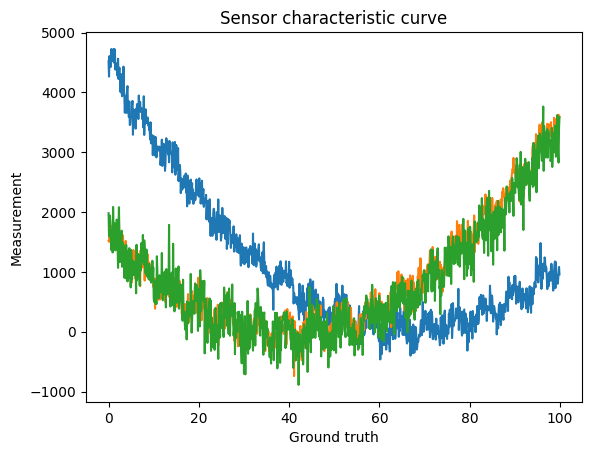

In [35]:
class Sensor:

    def __init__(self, variance, bias, pos):
        self.variance = variance
        self.bias = bias
        self.pos = pos

    def measure(self, ground_truth):
        epsilon = 1e-5
        noise = np.random.normal(loc=self.bias, scale=self.variance)
        measurement = np.log(ground_truth+epsilon) + \
                      noise + \
                      (self.pos-ground_truth)**2 + \
                      np.sin(ground_truth) * 150
        return measurement

    def measure_many(self, ground_truth, N):
        measurements = [self.measure(ground_truth) for _ in range(N)]
        return measurements

    def show_characteristic_curve(self, start, end, step=0.1):
        ground_truths = []
        measurements = []
        for ground_truth in np.arange(start,end,step):
            ground_truths.append( ground_truth )
            measurements.append( self.measure(ground_truth) )
            
        plt.plot(ground_truths, measurements)
        plt.title("Sensor characteristic curve")
        plt.xlabel("Ground truth")
        plt.ylabel("Measurement")
        
    def __str__(self):
        return f"Distance sensor: variance={self.variance:.2f}"

    def __repr__(self):
        return str(self)

class SensorFusionML:

    def __init__(self, nr_sensors, max_variance):        
        self.nr_sensors = nr_sensors
        self.sensors = []
        self.sensor_variances = []
        for _ in range(nr_sensors):
            variance = np.random.uniform(low=0, high=max_variance)
            bias = np.random.uniform(low=-50, high=+50)
            pos = np.random.uniform(low=30, high=+70)
            self.sensors.append( Sensor(variance, bias, pos) )

        for sensor in self.sensors:
            sensor.show_characteristic_curve(0.0, 100.0)

sfml = SensorFusionML(3, 300)

## Tabelle mit Beispieldaten erzeugen

In [40]:
example_vec = [sensor.measure(10) for sensor in sfml.sensors]
example_vec + [10]

[np.float64(3053.3267764284487),
 np.float64(728.6994711996438),
 np.float64(834.328554303685),
 10]

In [48]:
list_of_example_vecs = []
for ground_truth in np.arange(0.0,100.0,0.1):
    example_vec = [sensor.measure(ground_truth) for sensor in sfml.sensors]
    example_vec += [ground_truth]
    list_of_example_vecs.append( example_vec )

import pandas
col_names = [f"S{sensor_nr+1}" for sensor_nr in range(sfml.nr_sensors)]
col_names += ["Distance"]
t = pandas.DataFrame(list_of_example_vecs, columns=col_names)
t

,S1,S2,S3,Distance
0,4321.276799,1520.846499,1086.419639,0.0
1,4331.770873,1604.614288,2069.076535,0.1
2,4504.027832,1847.619128,1710.392236,0.2
3,4681.984365,1901.169528,1141.478654,0.3
4,4508.856662,1673.138171,1617.752268,0.4
...,...,...,...,...
995,919.932645,3373.895702,3129.503549,99.5
996,874.868609,3576.064252,3394.579003,99.6
997,734.390485,3310.867824,2769.369657,99.7
998,1072.265127,3353.927246,3252.080848,99.8


## Daten fürs ML vorbereiten

In [53]:
x = t.drop("Distance", axis="columns")
y = t[ ["Distance"] ]

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [56]:
x_train

,S1,S2,S3
810,-22.345328,1482.171974,1360.544929
666,-145.327082,471.980467,68.352769
406,926.531603,-18.241557,20.994561
201,2241.560852,708.670493,567.285589
93,3341.854246,857.982466,1264.972756
...,...,...,...
639,-51.506141,854.124891,399.292707
398,983.988351,-127.383569,-42.108911
493,190.623742,47.193834,160.755840
766,307.015290,1619.799014,1633.760967


In [57]:
y_train

,Distance
810,81.0
666,66.6
406,40.6
201,20.1
93,9.3
...,...
639,63.9
398,39.8
493,49.3
766,76.6


In [61]:
print(x_train.iloc[42].values, "-->", y_train.iloc[42].values) 

[3302.92994249  925.32410211 1388.09134072] --> [7.9]


In [62]:
x_test

,S1,S2,S3
738,-346.444903,1261.163008,638.379937
12,4433.789797,1809.863730,1926.284593
371,836.155503,49.935661,-323.145192
7,4469.135577,1838.109486,1660.549044
605,-27.362011,207.639483,406.489628
...,...,...,...
974,1190.692863,3188.865043,3400.265149
759,-192.542499,1332.218577,1166.704898
769,593.862023,1480.117418,1348.693174
711,475.715069,1260.654649,1328.095977


In [63]:
y_test

,Distance
738,73.8
12,1.2
371,37.1
7,0.7
605,60.5
...,...
974,97.4
759,75.9
769,76.9
711,71.1


## Lernende Sensordatenfusion

In [64]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model = model.fit(x_train, y_train)

In [66]:
x_test

,S1,S2,S3
738,-346.444903,1261.163008,638.379937
12,4433.789797,1809.863730,1926.284593
371,836.155503,49.935661,-323.145192
7,4469.135577,1838.109486,1660.549044
605,-27.362011,207.639483,406.489628
...,...,...,...
974,1190.692863,3188.865043,3400.265149
759,-192.542499,1332.218577,1166.704898
769,593.862023,1480.117418,1348.693174
711,475.715069,1260.654649,1328.095977


In [70]:
model.predict( [[4433.789797,	1809.863730,	1926.284593]] )

/home/juebrauer/miniconda3/envs/env_teaching/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([1.4])

In [69]:
y_test

,Distance
738,73.8
12,1.2
371,37.1
7,0.7
605,60.5
...,...
974,97.4
759,75.9
769,76.9
711,71.1


## Modellgüte einschätzen

In [77]:
preds = model.predict(x_test)
preds

array([73.9,  1.4, 44.2,  0.2, 59.7, 66.4, 16.2, 32.8, 81.9, 91.8, 91.8,
       70. , 78.4,  3.7, 78.1, 59.7, 95.4, 55.7, 70.6, 39.6,  7.8, 34.7,
       23. , 57. , 57.4, 60.1, 74.6, 10. ,  4. , 49.4, 61.4,  5. , 60.8,
       62.8, 19.7, 10.8, 22.3, 62.6,  7.1, 23. , 48.7,  9.2, 12.4, 65.4,
        1.8, 88.7, 48.2, 57.8, 56.7, 50.3, 52.5, 16. , 56.6, 86.5, 88.1,
       34.6,  4. , 40.1, 91.8, 34.4, 28.7, 40.2, 43.6, 44.2, 86.5, 17.5,
       44.9, 10.6, 46.1, 95.5, 22.5, 71.2, 27.3, 96.3, 32. , 59.7, 27.8,
       59.2, 29. , 72.2, 94.2, 36. , 81.4, 91.9, 96.8,  3.2,  7.7, 72.9,
        4. , 64.8,  5.7, 32.5, 74.8, 30.8, 48.9, 54.6, 83.1, 86.5, 84.4,
       40.5, 78.3,  0.9, 93.1, 55.4, 71.2, 56.5, 70.4, 15.1,  1.8, 27.1,
       53.4, 70.4, 95.2, 85.9, 26.6, 45.1, 50.8, 34.7, 22.4, 12.5, 19.6,
       68.6, 53.6, 63.6, 38.3, 84.4, 70.8, 53.4, 26.9, 62.8, 24.2, 90.6,
       27.4, 43.6,  7.7, 38.6, 17.5, 48.1, 46. , 68.8, 95.5, 33.3,  3.6,
       95.5, 82.9, 50.2, 61.4, 87.4, 33.1, 75.8, 89

In [78]:
gt = y_test.values.flatten()
gt

array([73.8,  1.2, 37.1,  0.7, 60.5, 67. , 11.6, 37.6, 84.5, 90. , 91.1,
       64.3, 79.9,  2.8, 81.1, 48.6, 98.3, 54. , 71.8, 52.2,  8.5, 32.4,
       28.5, 67.2, 58.2, 67.8, 72. ,  8.7,  3.8, 49.1, 61.6,  5.5, 67.6,
       74.7, 19.5, 14. , 25.2, 57.7,  8.1, 27.5, 42. ,  8.6, 15.3, 62.4,
        0.6, 83.6, 48.8, 57.5, 60. , 49.9, 52.8, 20.7, 58.3, 81.2, 88.2,
       95.1,  3.5, 44.6, 91.2, 33.4, 30.1, 39.3, 37.2, 37.4, 83.2, 26.5,
       52. ,  9.1, 45.4, 96. , 25.9, 73.1, 21.9, 99.1, 33.7, 61.1, 23.5,
       50. , 39.4, 74.1, 93.2, 35.3, 81.7, 89.1, 96.4,  1.1,  6. , 73.7,
        7. , 65.2,  5.2, 34.5, 74.3, 39. , 54.4, 47.7, 85.3, 84. , 85.6,
       43.9, 71.3,  2.1, 92.6, 55.5, 72.5, 56.9, 70.1, 11.9,  0.1, 27.9,
       52.1, 70.2, 95.8, 86.2, 27.7, 42.7, 52.6, 29.4, 25.7,  9.8, 17.2,
       59.4, 50.1, 68. , 39.2, 82. , 71.4, 50.9, 26.3, 63.5, 25.8, 89.3,
       22.2, 40.9,  5.1, 38. , 18.5, 43.3, 41.7, 67.3, 98.6, 95.6,  4.1,
       96.2, 85.7, 51. , 60.6, 86.9, 34. , 75.3, 92

In [79]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(preds, gt)
MAE

3.5060000000000002

## Eine SensorFusionsML Klasse

Experiments with 1 sensors are running...
Experiments with 2 sensors are running...
Experiments with 3 sensors are running...
Experiments with 4 sensors are running...
Experiments with 5 sensors are running...
Experiments with 6 sensors are running...
Experiments with 7 sensors are running...
Experiments with 8 sensors are running...
Experiments with 9 sensors are running...
Experiments with 10 sensors are running...


Text(0, 0.5, 'MAE averaged over 20 runs')

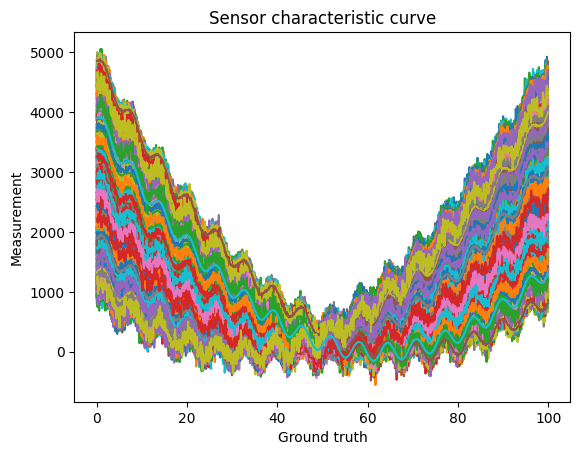

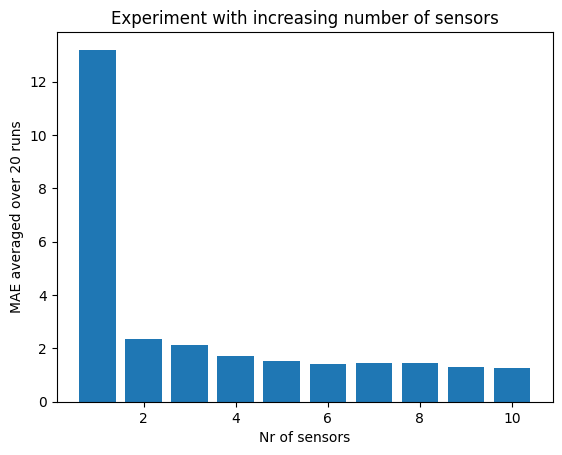

In [43]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


class Sensor:

    def __init__(self, variance, bias, pos):
        self.variance = variance
        self.bias = bias
        self.pos = pos

    def measure(self, ground_truth):
        epsilon = 1e-5
        noise = np.random.normal(loc=self.bias, scale=self.variance)
        measurement = np.log(ground_truth+epsilon) + \
                      noise + \
                      (self.pos-ground_truth)**2 + \
                      np.sin(ground_truth) * 150
        return measurement

    def measure_many(self, ground_truth, N):
        measurements = [self.measure(ground_truth) for _ in range(N)]
        return measurements

    def show_characteristic_curve(self, start, end, step=0.1):
        ground_truths = []
        measurements = []
        for ground_truth in np.arange(start,end,step):
            ground_truths.append( ground_truth )
            measurements.append( self.measure(ground_truth) )
            
        plt.plot(ground_truths, measurements)
        plt.title("Sensor characteristic curve")
        plt.xlabel("Ground truth")
        plt.ylabel("Measurement")
        
    def __str__(self):
        return f"Distance sensor: variance={self.variance:.2f}"

    def __repr__(self):
        return str(self)

class ExperimentSensorFusionML:

    def __init__(self, nr_sensors, max_variance):        
        self.nr_sensors = nr_sensors
        self.sensors = []
        self.sensor_variances = []
        for _ in range(nr_sensors):
            variance = np.random.uniform(low=0, high=max_variance)
            bias = np.random.uniform(low=-50, high=+50)
            pos = np.random.uniform(low=30, high=+70)
            self.sensors.append( Sensor(variance, bias, pos) )

        for sensor in self.sensors:
            sensor.show_characteristic_curve(0.0, 100.0)

        self.result = self.build_and_test_model()
        

    def build_and_test_model(self):
        
        # 1. Prepare a table with example data
        list_of_example_vecs = []
        for ground_truth in np.arange(0.0,100.0,0.1):
            example_vec = [sensor.measure(ground_truth) for sensor in self.sensors]
            example_vec += [ground_truth]
            list_of_example_vecs.append( example_vec )
        
        col_names = [f"S{sensor_nr+1}" for sensor_nr in range(self.nr_sensors)]
        col_names += ["Distance"]
        t = pandas.DataFrame(list_of_example_vecs, columns=col_names)

        # 2. Prepare data for ML
        x = t.drop("Distance", axis="columns")
        y = t[ ["Distance"] ]
        x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

        self.input_feature_names = x_train.columns
        
        # 3. Build a Decision Tree
        model = DecisionTreeRegressor(max_depth=5)
        self.model = model.fit(x_train, y_train)

        # 4. Generate model predictions and prepare ground truth
        preds = model.predict(x_test)
        gt = y_test.values.flatten()

        # 5. How good is our decision tree to estimate the distance?   
        MAE = mean_absolute_error(preds, gt)

        return MAE

x = []
y = []
for nr_sensors in range(1,11):
    print(f"Experiments with {nr_sensors} sensors are running...")
    run_results = []
    for run_nr in range(1,2):
        sfml = ExperimentSensorFusionML(nr_sensors, 100)
        run_results.append( sfml.result )
    mean_error = np.mean(run_results)

    x.append(nr_sensors)
    y.append(mean_error)

plt.figure()
plt.bar(x,y)
plt.title("Experiment with increasing number of sensors")
plt.xlabel("Nr of sensors")
plt.ylabel("MAE averaged over 20 runs")


# Den Decision Tree verstehen

sklearn.tree._classes.DecisionTreeRegressor

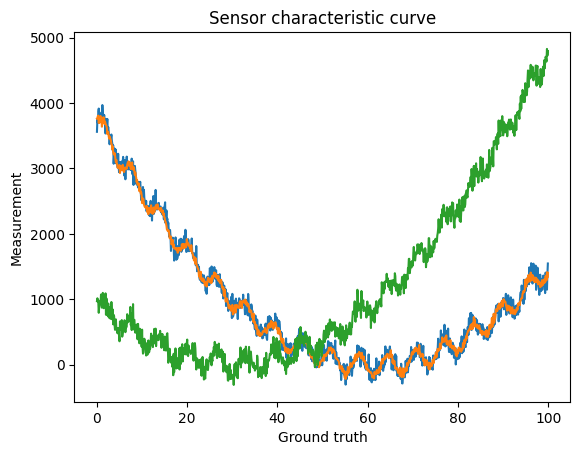

In [44]:
sfml = ExperimentSensorFusionML(3, 100)
type(sfml.model)

In [41]:
sfml.input_feature_names

Index(['S1', 'S2', 'S3'], dtype='object')

In [45]:
from sklearn.tree import export_text
print( export_text(sfml.model, feature_names=sfml.input_feature_names) )

|--- S3 <= 1143.82
|   |--- S2 <= 778.00
|   |   |--- S3 <= 378.92
|   |   |   |--- S2 <= 435.07
|   |   |   |   |--- S2 <= 132.32
|   |   |   |   |   |--- value: [49.78]
|   |   |   |   |--- S2 >  132.32
|   |   |   |   |   |--- value: [43.86]
|   |   |   |--- S2 >  435.07
|   |   |   |   |--- S3 <= 56.53
|   |   |   |   |   |--- value: [36.18]
|   |   |   |   |--- S3 >  56.53
|   |   |   |   |   |--- value: [38.88]
|   |   |--- S3 >  378.92
|   |   |   |--- S3 <= 716.46
|   |   |   |   |--- S2 <= 89.18
|   |   |   |   |   |--- value: [55.03]
|   |   |   |   |--- S2 >  89.18
|   |   |   |   |   |--- value: [50.68]
|   |   |   |--- S3 >  716.46
|   |   |   |   |--- S3 <= 1076.35
|   |   |   |   |   |--- value: [59.79]
|   |   |   |   |--- S3 >  1076.35
|   |   |   |   |   |--- value: [65.25]
|   |--- S2 >  778.00
|   |   |--- S2 <= 1890.74
|   |   |   |--- S2 <= 1173.05
|   |   |   |   |--- S3 <= -56.42
|   |   |   |   |   |--- value: [29.73]
|   |   |   |   |--- S3 >  -56.42
|   |   |

In [ ]:
Pause bis 10:52 Uhr!

# Vergleich der Modellleistung mit Baseline

In [46]:
type(sfml.model)

sklearn.tree._classes.DecisionTreeRegressor

In [47]:
sfml.result

1.8549824056239148

In [48]:
sfml.nr_sensors

3

{'DT': 1.0205000000000002, 'KNN': 0.5607999999999999}

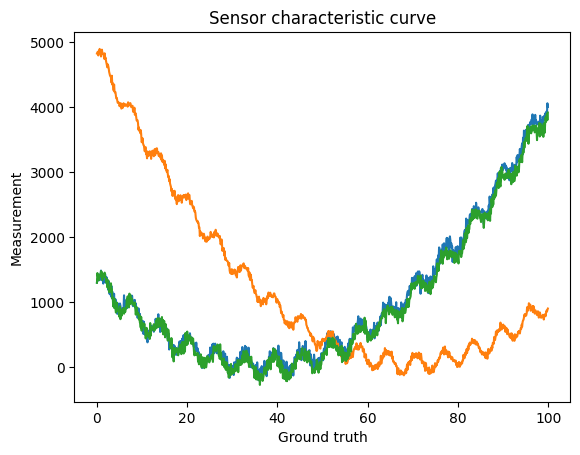

In [72]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error



class Sensor:

    def __init__(self, variance, bias, pos):
        self.variance = variance
        self.bias = bias
        self.pos = pos

    def measure(self, ground_truth):
        epsilon = 1e-5
        noise = np.random.normal(loc=self.bias, scale=self.variance)
        measurement = np.log(ground_truth+epsilon) + \
                      noise + \
                      (self.pos-ground_truth)**2 + \
                      np.sin(ground_truth) * 150
        return measurement

    def measure_many(self, ground_truth, N):
        measurements = [self.measure(ground_truth) for _ in range(N)]
        return measurements

    def show_characteristic_curve(self, start, end, step=0.1):
        ground_truths = []
        measurements = []
        for ground_truth in np.arange(start,end,step):
            ground_truths.append( ground_truth )
            measurements.append( self.measure(ground_truth) )
            
        plt.plot(ground_truths, measurements)
        plt.title("Sensor characteristic curve")
        plt.xlabel("Ground truth")
        plt.ylabel("Measurement")
        
    def __str__(self):
        return f"Distance sensor: variance={self.variance:.2f}"

    def __repr__(self):
        return str(self)

class ExperimentSensorFusionML:

    def __init__(self, nr_sensors, max_variance):        
        self.nr_sensors = nr_sensors
        self.sensors = []
        self.sensor_variances = []
        for _ in range(nr_sensors):
            variance = np.random.uniform(low=0, high=max_variance)
            bias = np.random.uniform(low=-50, high=+50)
            pos = np.random.uniform(low=30, high=+70)
            self.sensors.append( Sensor(variance, bias, pos) )

        for sensor in self.sensors:
            sensor.show_characteristic_curve(0.0, 100.0)

        self.result = self.build_and_test_model()
        

    def build_and_test_model(self):
        
        # 1. Prepare a table with example data
        list_of_example_vecs = []
        for ground_truth in np.arange(0.0,100.0,0.1):
            example_vec = [sensor.measure(ground_truth) for sensor in self.sensors]
            example_vec += [ground_truth]
            list_of_example_vecs.append( example_vec )
        
        col_names = [f"S{sensor_nr+1}" for sensor_nr in range(self.nr_sensors)]
        col_names += ["Distance"]
        t = pandas.DataFrame(list_of_example_vecs, columns=col_names)

        # 2. Prepare data for ML
        x = t.drop("Distance", axis="columns")
        y = t[ ["Distance"] ]
        x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

        self.input_feature_names = x_train.columns
        
        # 3. Build a Decision Tree
        model_dt = DecisionTreeRegressor()
        self.model_dt = model_dt.fit(x_train, y_train)

        model_knn = KNeighborsRegressor(weights="uniform")
        self.model_knn = model_knn.fit(x_train, y_train)

        # 4. Generate model predictions and prepare ground truth
        preds_dt = self.model_dt.predict(x_test)
        preds_knn = self.model_knn.predict(x_test)
        gt = y_test.values.flatten()

        # 5. How good is our decision tree to estimate the distance?   
        MAE_dt = mean_absolute_error(preds_dt, gt)
        MAE_knn = mean_absolute_error(preds_knn, gt)

        return {"DT": MAE_dt,
                "KNN" : MAE_knn}

sfml = ExperimentSensorFusionML(3, 100)
sfml.result